# **Objective:**
* Identify fraudulent transactions while minimizing false positives, and provide explainability for client trust and regulatory compliance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# **EDA**

In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
print(df.isnull().sum().sum())

0


DataFrame does not have any missing values so this is a clean dataset as far as NULL values are concerned.

In [7]:
print(df.duplicated().sum())

1081


# **Quantify and Visualize Class Imbalance**

In [8]:
class_counts = df['Class'].value_counts()
fig = px.pie(values=class_counts,
             names=['non-fraud', 'fraud'],
             title='Class Distribution')
fig.show()

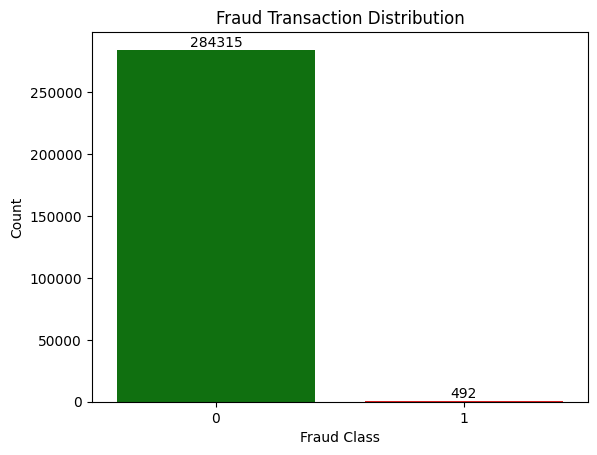

In [9]:
ax = sns.countplot(x='Class', data=df, hue='Class', palette={0: 'green', 1: 'red'}, legend=False)
for container in ax.containers:
  ax.bar_label(container, label_type='edge')

plt.title('Fraud Transaction Distribution')
plt.xlabel('Fraud Class')
plt.ylabel('Count')
plt.show()

* Standard metrics like accuracy will be misleading (a model predicting all transactions as non-fraud would achieve 99% accuracy but fail at fraud detection). This visualization justifies the need for fraud-specific metrics like precision, recall, or F1-score which focus on the minority class (fraud).

# **Transaction Amount Analysis**

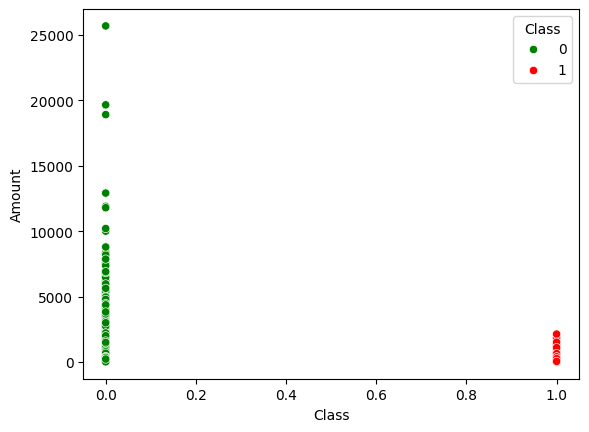

In [10]:
sns.scatterplot(data=df, x='Class', y='Amount', hue='Class', palette={0: 'green', 1: 'red'});

* The scatter plot shows that fraud amounts are generally clustered at lower values.

In [11]:
legitimate_data = df[df['Class'] == 0]
fraud_data = df[df['Class'] == 1]

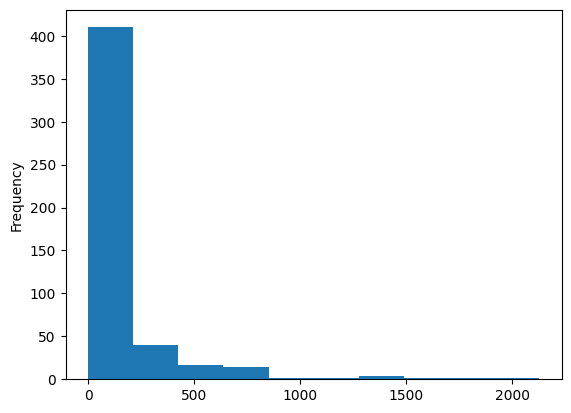

In [12]:
fraud_data['Amount'].plot(kind='hist');

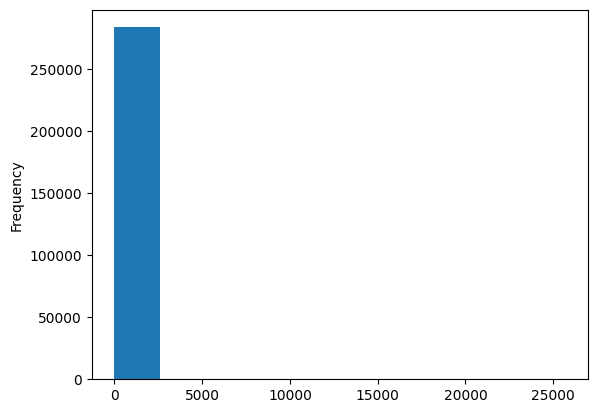

In [13]:
legitimate_data['Amount'].plot(kind='hist');

# **Anomaly Detection**

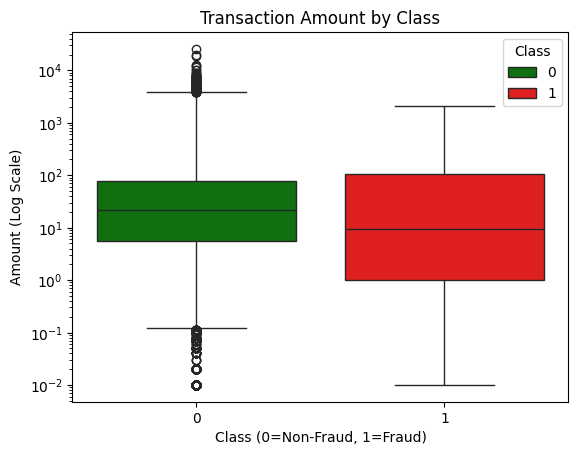

In [14]:
sns.boxplot(data=df, x=df['Class'], y=df['Amount'], log_scale=True, hue=df['Class'], palette=({0: 'green', 1: 'red'}))
plt.title('Transaction Amount by Class')
plt.xlabel('Class (0=Non-Fraud, 1=Fraud)')
plt.ylabel('Amount (Log Scale)');

In [15]:
print('Maximum Fraud Amount: $', round(df[df['Class'] == 1]['Amount'].max(), 2))
print('Maximum Non-Fraud Amount: $', round(df[df['Class'] == 0]['Amount'].max(), 2))
print('----------------------------------')
print('Average Fraud Amount: $', round(df[df['Class'] == 1]['Amount'].mean(), 2))
print('Average Non-Fraud Amount: $', round(df[df['Class'] == 0]['Amount'].mean(), 2))

Maximum Fraud Amount: $ 2125.87
Maximum Non-Fraud Amount: $ 25691.16
----------------------------------
Average Fraud Amount: $ 122.21
Average Non-Fraud Amount: $ 88.29


* The maximum fraud amount (\$2,125.87) is much lower than the maximum non-fraud amount ($25,691.16), indicating that extremely large transactions are more likely legitimate (e.g., high-value purchases), while fraudsters may avoid such amounts to evade detection.

In [16]:
df['Amount_Z'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()
outliers = df[df['Amount_Z'].abs() > 3]
print(f"Outliers: {len(outliers)}, Fraud in outliers: {outliers['Class'].sum()}")

Outliers: 4076, Fraud in outliers: 11


# **Amount vs Time**

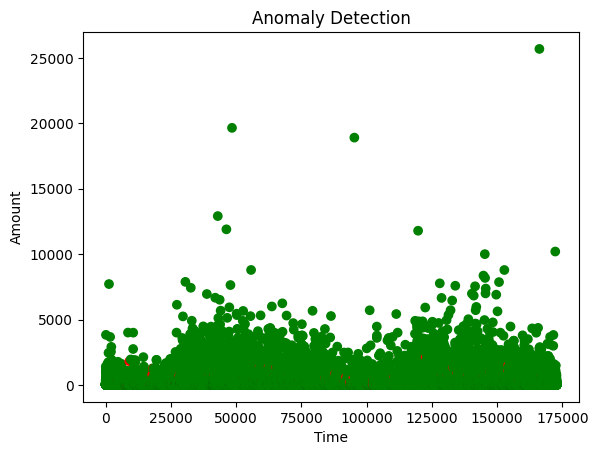

In [17]:
colors = df['Class'].map({0: 'green', 1: 'red'})

plt.scatter(x=df['Time'], y=df['Amount'], c=colors)
plt.title('Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Amount');

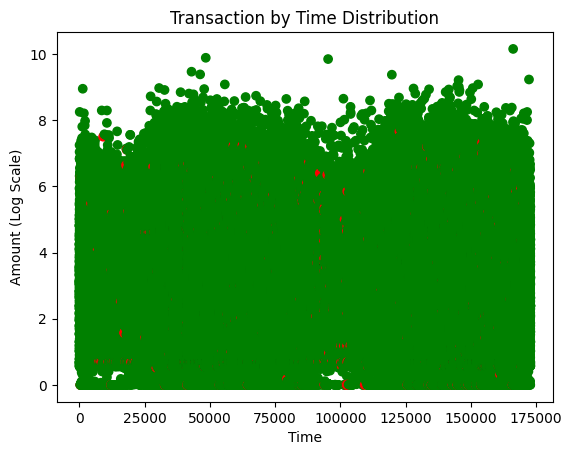

In [18]:
plt.scatter(x=df['Time'], y=np.log1p(df['Amount']), c=colors, facecolors='none')
plt.title('Transaction by Time Distribution')
plt.xlabel('Time')
plt.ylabel('Amount (Log Scale)');

* The above scatter plot (Amount vs. Time) shows that high-amount frauds are sparse and spread across time, not concentrated in specific periods so it is going to be difficult to catch most frauds based solely on Amount or certain time of the day.

# **Time-based Analysis**

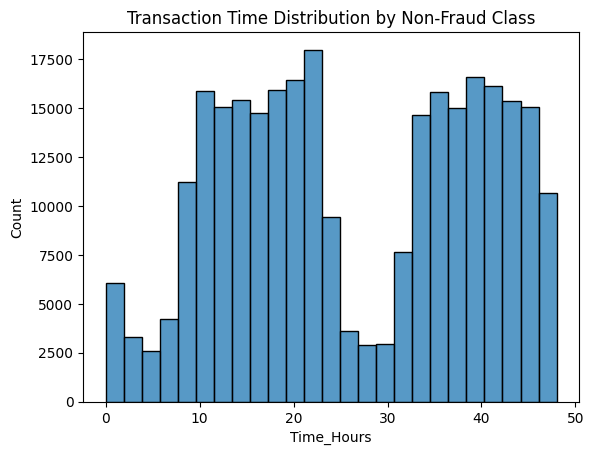

In [19]:
import plotly.graph_objects as go

df['Time_Hours'] = df['Time'] / 3600
fraud = df[df['Class'] == 1]['Time_Hours']
non_fraud = df[df['Class'] == 0]['Time_Hours']

sns.histplot(data=df, x=non_fraud, bins=25)
plt.title('Transaction Time Distribution by Non-Fraud Class');

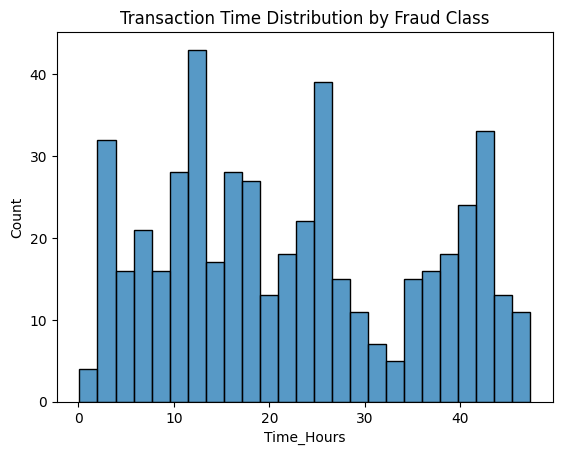

In [20]:
sns.histplot(data=df, x=fraud, bins=25)
plt.title('Transaction Time Distribution by Fraud Class');

* The fraud histogram shows peaks, but they are less pronounced and more evenly distributed across time. This indicates fraudsters may not follow the same temporal patterns as legitimate users, possibly to avoid detection.

# **PCA Feature Exploration**

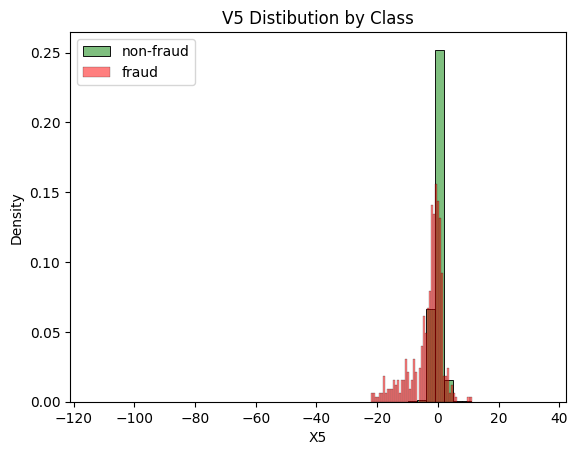

In [21]:
sns.histplot(x=df[df['Class'] == 0]['V5'], stat='density', bins=50, color='green', label='non-fraud', alpha=0.5)
sns.histplot(x=df[df['Class'] == 1]['V5'], stat='density', bins=50, color='red', label='fraud', alpha=0.5)

plt.title('V5 Distibution by Class')
plt.xlabel('X5')
plt.ylabel('Density')
plt.legend()
plt.show()

* The density plot shows that non-fraud transactions (green) have a narrow distribution for V5 (centered around 0), while fraud transactions (red) have a much wider distribution, with a long tail toward negative values (down to -120).
* This suggests V5 captures a behavioral or transactional pattern that differs significantly between fraud and non-fraud, making it a potentially strong predictor.

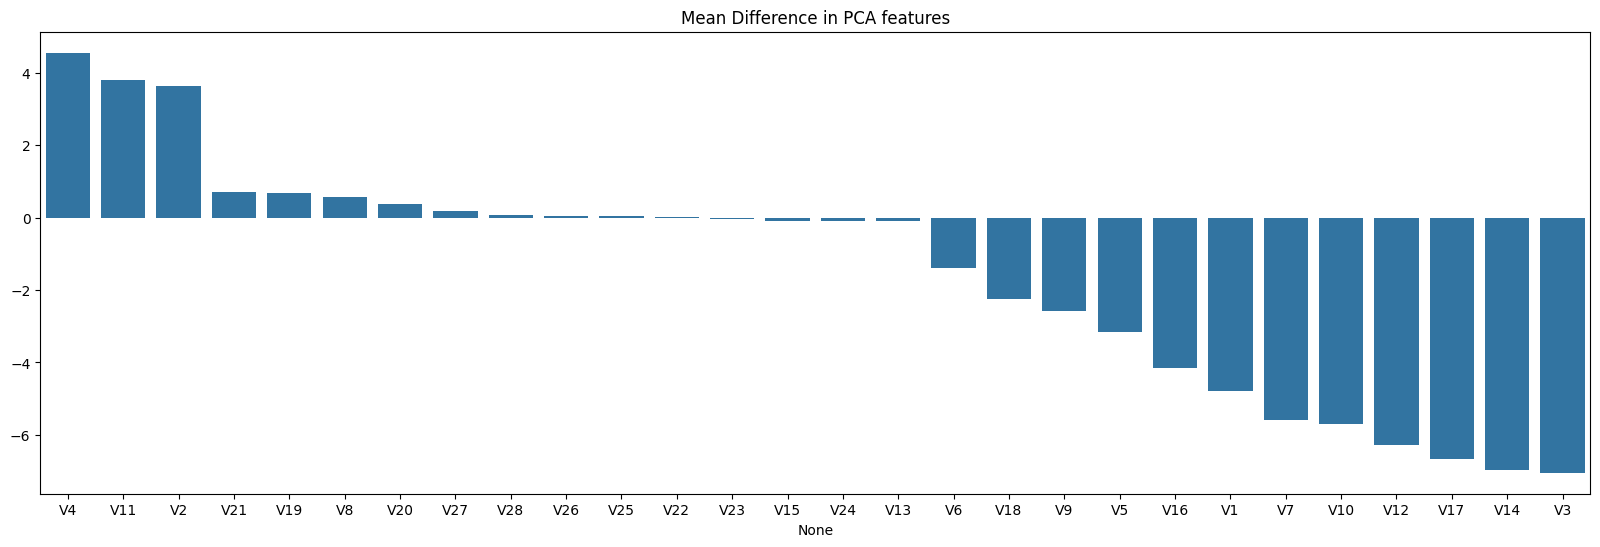

In [22]:
mean_diff = df.groupby('Class')[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
                                 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
                                 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
                                 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']].mean().diff().iloc[1]
mean_diff = mean_diff.sort_values(ascending=False)

plt.figure(figsize=(20, 6))
sns.barplot(x=mean_diff.index, y=mean_diff.values)
plt.title('Mean Difference in PCA features');

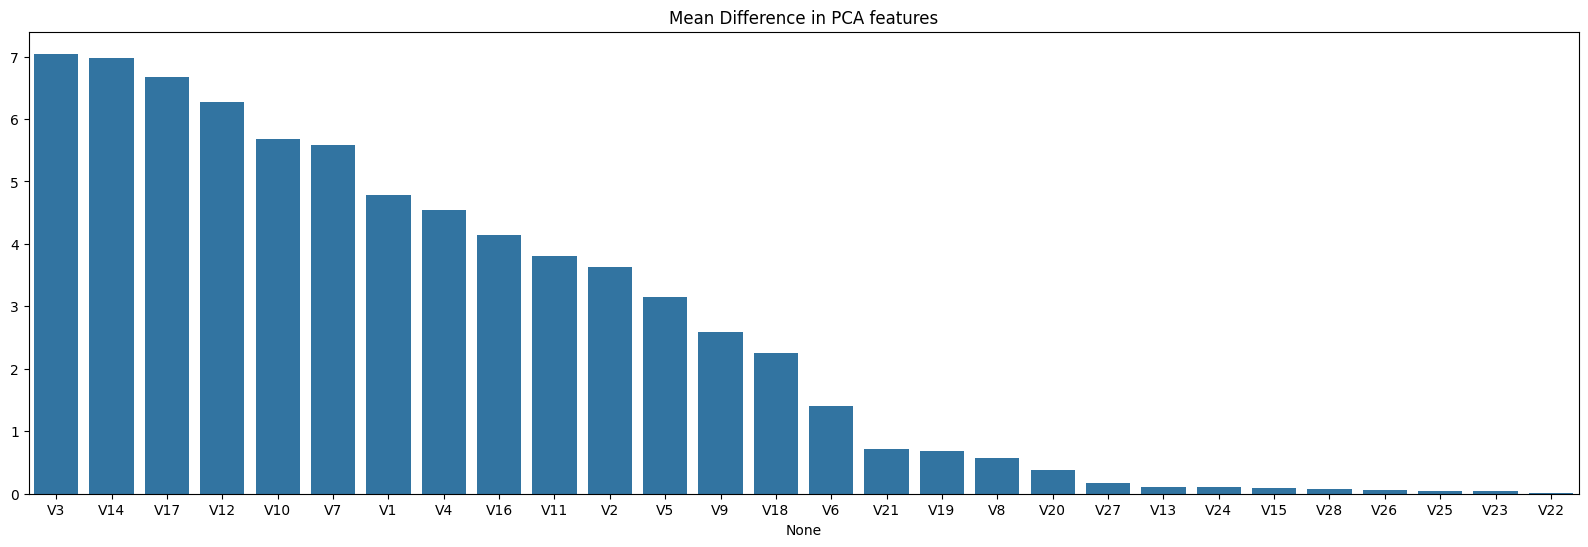

In [23]:
mean_diff = df.groupby('Class')[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
                                 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
                                 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
                                 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']].mean().diff().iloc[1].abs()
mean_diff = mean_diff.sort_values(ascending=False)

plt.figure(figsize=(20, 6))
sns.barplot(x=mean_diff.index, y=mean_diff.values)
plt.title('Mean Difference in PCA features');

* Features like V3, V14, V17, V12, V10, V7, and V1 are likely strong predictors of fraud because they show the strongest correlations with Class.

# **Correlation Matrix**

In [24]:
corr_imbalanced = df.corr()
corr_imbalanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Z,Time_Hours
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323,-0.010596,1.000000
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347,-0.227709,0.117396
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289,-0.531409,-0.010593
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961,-0.210880,-0.419618
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447,0.098732,-0.105260
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974,-0.386356,0.173072
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643,0.215981,-0.063016
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257,0.397311,0.084714
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875,-0.103079,-0.036949
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733,-0.044246,-0.008660


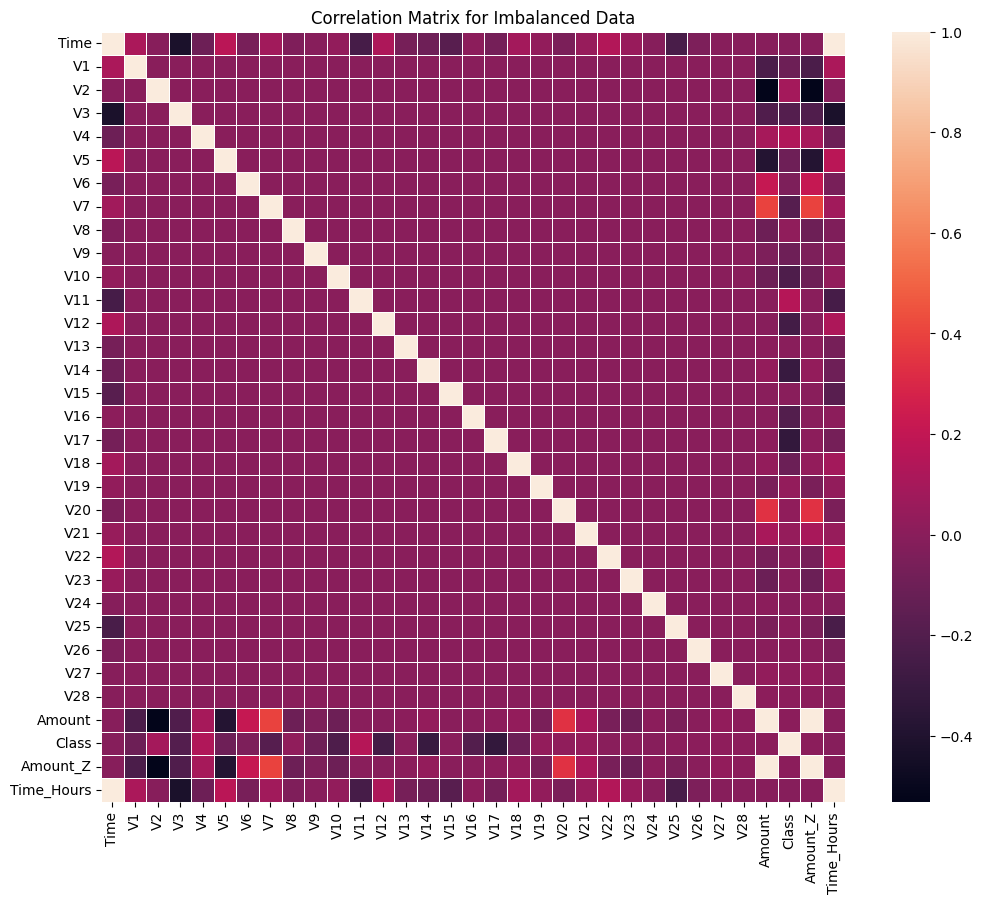

In [25]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_imbalanced, annot=False, linewidths=0.5)
plt.title("Correlation Matrix for Imbalanced Data")
plt.show();

* Most of the V1-V28 features show very low correlations with each other (mostly purple, close to 0) because the V1-V28 features are PCA-transformed (Principal Component Analysis).
* V1, V3, V10, V14, and V17 show the strongest negative correlations with Class (-0.2 to -0.4), indicating they are key predictors of fraud.
* Small positive correlation (~0.1) suggests higher amounts are slightly more likely to be fraudulent, but not a strong indicator alone.
* PCA ensures that the resulting components are orthogonal (uncorrelated) to each other, which is why we see near-zero correlations.
* The lack of correlation between PCA features is a good sign as it means there is no multicollinearity among these features, so they can be used directly in models like logistic regression or random forests without causing redundancy or instability.

# **Feature Engineering**

In [26]:
from sklearn.ensemble import IsolationForest

# Time-Based Features
df['Hour_of_Day'] = (df['Time'] // 3600) % 24

df = df.sort_values('Time')
df['Time_Since_Last'] = df['Time'].diff().fillna(0)

df['Avg_Time_Between'] = df['Time_Since_Last'].rolling(window=5).mean().fillna(df['Time_Since_Last'].mean())

df['Is_Night'] = df['Hour_of_Day'].apply(lambda x: 1 if x > 22 or x < 6 else 0)

# PCA Interactions
df['V3_V14'] = df['V3'] * df['V14']
df['V14_V17'] = df['V14'] * df['V17']
df['V3_V17'] = df['V3'] * df['V17']
df['Amount_V3'] = df['Amount'] * df['V3']
df['Amount_V14'] = df['Amount'] * df['V14']
df['Amount_V17'] = df['Amount'] * df['V17']
df['Amount_V12'] = df['Amount'] * df['V12']
df['Amount_V10'] = df['Amount'] * df['V10']

df['V3_V14_Ratio'] = df['V3'] / (df['V14'] + 1e-6)

# Anomaly Scores
features_for_anomaly = ['Amount', 'V3', 'V14', 'V17', 'V12', 'V10']
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['Anomaly_Score'] = iso_forest.fit_predict(df[features_for_anomaly])
df['Anomaly_Score'] = df['Anomaly_Score'].map({1: 0, -1: 1}) # 1 for anomaly, 0 for normal

non_fraud_means = df[df['Class'] == 0][['V3', 'V14', 'V17', 'V12']].mean()
df['Distance_From_NonFraud'] = np.sqrt(
    (df['V3'] - non_fraud_means['V3'])**2 +
    (df['V14'] - non_fraud_means['V14'])**2 +
    (df['V17'] - non_fraud_means['V17'])**2 +
    (df['V12'] - non_fraud_means['V12'])**2
)

In [27]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V14_V17,V3_V17,Amount_V3,Amount_V14,Amount_V17,Amount_V12,Amount_V10,V3_V14_Ratio,Anomaly_Score,Distance_From_NonFraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.064714,0.527487,379.488199,-46.557159,31.116657,-92.435364,13.584624,-8.151043,0,2.628633
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.016506,-0.019113,0.447832,-0.386747,-0.308825,2.865483,-0.449161,-1.157951,0,1.084355
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.184195,1.968208,671.443450,-62.837083,420.301005,25.023248,78.626047,-10.685529,0,2.083880
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.196967,-1.226574,221.434677,-35.558583,-84.485459,22.011186,-6.786562,-6.227342,0,1.942483
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.265399,-0.367098,108.394762,-78.365692,-16.589956,37.668307,52.707679,-1.383193,0,1.995419


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284807 entries, 0 to 284806
Data columns (total 48 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    284807 non-null  float64
 1   V1                      284807 non-null  float64
 2   V2                      284807 non-null  float64
 3   V3                      284807 non-null  float64
 4   V4                      284807 non-null  float64
 5   V5                      284807 non-null  float64
 6   V6                      284807 non-null  float64
 7   V7                      284807 non-null  float64
 8   V8                      284807 non-null  float64
 9   V9                      284807 non-null  float64
 10  V10                     284807 non-null  float64
 11  V11                     284807 non-null  float64
 12  V12                     284807 non-null  float64
 13  V13                     284807 non-null  float64
 14  V14                     2

# **Feature Selection**

Top 10 Features by Correlation with Class:
V14_V17                   0.542507
V3_V14                    0.535225
V3_V17                    0.495806
Distance_From_NonFraud    0.433241
Anomaly_Score             0.347565
V17                       0.326481
V14                       0.302544
V12                       0.260593
V10                       0.216883
V16                       0.196539
dtype: float64


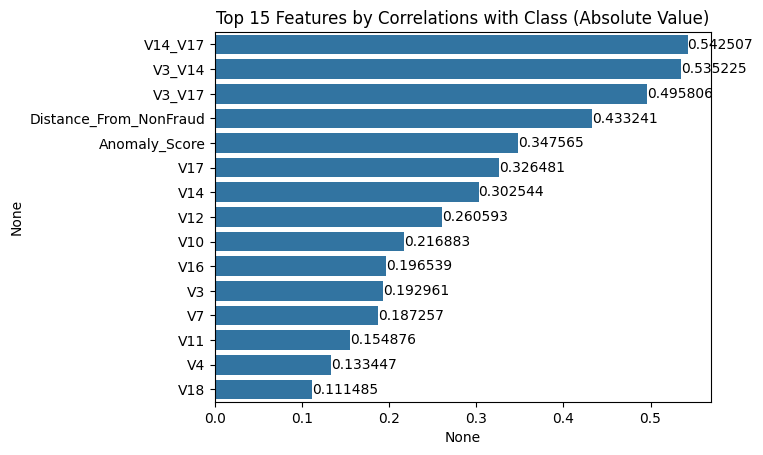

In [29]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

X = df.drop(columns=['Class'])
y = df['Class']

# 1. Correlation with Target
correlations = X.corrwith(y).abs().sort_values(ascending=False)
print(f'Top 10 Features by Correlation with Class:\n{correlations.head(10)}')

ax = sns.barplot(x=correlations.head(15), y=correlations.head(15).index)
ax.bar_label(ax.containers[0])
plt.title('Top 15 Features by Correlations with Class (Absolute Value)')
plt.show()

Top 10 Features by Random Forest Importance:
V14                       0.188630
V3_V14                    0.100500
Anomaly_Score             0.078260
Distance_From_NonFraud    0.076933
V4                        0.063405
V12                       0.060625
V10                       0.053556
V14_V17                   0.047242
V17                       0.044313
V3_V17                    0.027132
dtype: float64


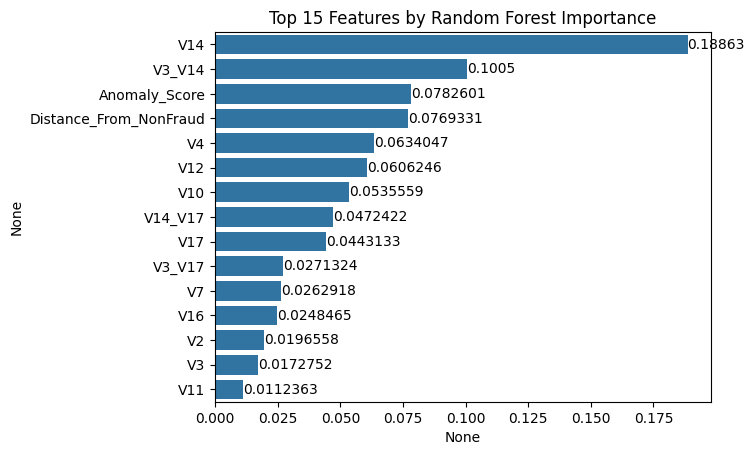

In [30]:
# 2. Feature Importance from Random Forest

rf = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')
rf.fit(X, y)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(f'Top 10 Features by Random Forest Importance:\n{feature_importance.head(10)}')

ax = sns.barplot(x=feature_importance.head(15), y=feature_importance.head(15).index)
ax.bar_label(ax.containers[0])
plt.title('Top 15 Features by Random Forest Importance')
plt.show()

In [31]:
# 3. Recursive Feature Elimination with XGBoost

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
rfe = RFE(estimator=xgb, n_features_to_select=15, step=1)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print(f'Selected Features by RFE:\n{selected_features}')

Selected Features by RFE:
Index(['V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V26', 'V27',
       'Amount', 'V14_V17', 'V3_V17', 'Amount_V14', 'Distance_From_NonFraud'],
      dtype='object')


* Let’s combine the insights from all three methods, prioritizing features that appear consistently and balancing predictive power with interpretability.

  * **Consistent Across All Methods:** V2, V4, V10, V12, V14, V17, Distance_From_NonFraud, V14_V17.
  * **High Correlation and Random Forest Importance:** V3_V14, Anomaly_Score.
  * **RFE Additions for Complementary Information:** V1, V7, V11, V16.

# **SMOTE**

In [32]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

final_features = ['V1', 'V2', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17',
                  'V14_V17', 'V3_V14', 'Anomaly_Score', 'Distance_From_NonFraud']

X = df[final_features]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f'Class distribution before SMOTE:\n{y_train.value_counts()}')
print(f'Class distribution after SMOTE:\n{y_train_smote.value_counts()}')

Class distribution before SMOTE:
Class
0    227451
1       394
Name: count, dtype: int64
Class distribution after SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


# **Model Selection**

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# 1. Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_smote_scaled, y_train_smote)
lr_pred = lr.predict(X_test_scaled)
lr_prob = lr.predict_proba(X_test_scaled)[:, 1]

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_smote, y_train_smote)
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]

# 3. XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train_smote, y_train_smote)
xgb_pred = xgb.predict(X_test)
xgb_prob = xgb.predict_proba(X_test)[:, 1]

# 4. LightGBM
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_smote, y_train_smote)
lgbm_pred = lgbm.predict(X_test)
lgbm_prob = lgbm.predict_proba(X_test)[:, 1]

# Evaluate all models
models = {'Logistic Regression': lr_pred, 'Random Forest': rf_pred, 'XGBoost': xgb_pred,
          'LightGBM': lgbm_pred}
probs = {'Logistic Regression': lr_prob, 'Random Forest': rf_prob, 'XGBoost': xgb_prob,
         'LightGBM': lgbm_prob}

for name, pred in models.items():
  print(f'\nModel: {name}')
  print(classification_report(y_test, pred))

  precision, recall, _ = precision_recall_curve(y_test, probs[name])
  auc_pr = auc(recall, precision)
  print(f'AUC-PR: {auc_pr:.3f}')

[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3317
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962

AUC-PR: 0.738

Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     

* Since Random Forest and XGBoost have outperformed other models, I am going to work with them going forward.

# **Hyperparameter Tuning**

### **RandomizedSearchCV**

In [34]:
from sklearn.utils import resample

# Sample 30% of the SMOTE-balanced training data
X_train_sample, y_train_sample = resample(X_train_smote, y_train_smote,
                                          n_samples=int(0.5 * len(X_train_smote)),
                                          random_state=42)

# Define the parameter distribution for RandomizedSearchCV
rf_param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_dist,
    n_iter=5,  # Number of random combinations to try
    scoring='average_precision',  # AUC-PR (sklearn's approximation)
    cv=2,  # 2-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV
rf_random_search.fit(X_train_sample, y_train_sample)

# Best parameters and score
print("Best Parameters from RandomizedSearchCV (Random Forest):")
print(rf_random_search.best_params_)
print(f"Best AUC-PR: {rf_random_search.best_score_:.3f}")

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best Parameters from RandomizedSearchCV (Random Forest):
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30}
Best AUC-PR: 1.000


In [35]:
# Define the parameter distribution for RandomizedSearchCV
xgb_param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_dist,
    n_iter=5,
    scoring='average_precision',  # AUC-PR (sklearn's approximation)
    cv=2,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV
xgb_random_search.fit(X_train_sample, y_train_sample)

# Best parameters and score
print("Best Parameters from RandomizedSearchCV (XGBoost):")
print(xgb_random_search.best_params_)
print(f"Best AUC-PR: {xgb_random_search.best_score_:.3f}")

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best Parameters from RandomizedSearchCV (XGBoost):
{'subsample': 0.8, 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.3, 'colsample_bytree': 0.8}
Best AUC-PR: 1.000


# **Final Model**

In [36]:
# Initialize Random Forest
rf_final = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=2,
                                  max_features='log2', max_depth= 30, random_state=42)

# Fit Random Forest on the full SMOTE dataset
rf_final.fit(X_train_smote, y_train_smote)

# Evaluate on test set
rf_pred = rf_final.predict(X_test)
rf_prob = rf_final.predict_proba(X_test)[:, 1]

print("\nRandom Forest (Tuned) Performance on Test Set:")
print(classification_report(y_test, rf_pred))
precision, recall, _ = precision_recall_curve(y_test, rf_prob)
auc_pr_rf = auc(recall, precision)
print(f"AUC-PR (Test): {auc_pr_rf:.3f}")


Random Forest (Tuned) Performance on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.85      0.81        98

    accuracy                           1.00     56962
   macro avg       0.88      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962

AUC-PR (Test): 0.844


In [37]:
from sklearn.metrics import roc_auc_score

roc_score_rf = roc_auc_score(y_test, rf_prob)
print(f'ROC-AUC Score for Random Forest: {roc_score_rf}')

ROC-AUC Score for Random Forest: 0.9767282194250799


**Performance:**

Precision (fraud): 0.77, Recall (fraud): 0.85, F1-score (fraud): 0.81, AUC-PR: 0.844, ROC-AUC Score: 0.98.

* **Recall:** The model catches 85% of fraud cases (83/98), which is strong.

* **Precision:** 77% precision means ~25 false positives (83 true positives / 0.77 precision), which is low and practical for deployment.

* **F1-Score:** The F1-score for fraud (0.81) is the same as the untuned model.

* **AUC-PR:** 0.844 is very close to the untuned model’s AUC-PR (0.845).

* **ROC-AUC:** A score of 0.98 indicates excellent overall discrimination between fraud and non-fraud across all thresholds.

In [38]:
# Initialize XGBoost
xgb_final = XGBClassifier(subsample=0.8, n_estimators=50, max_depth=7, learning_rate=0.3,
                          colsample_bytree=0.8, eval_metric='logloss', random_state=42)

# Fit XGBoost on the full SMOTE dataset
xgb_final.fit(X_train_smote, y_train_smote)

# Evaluate on test set
xgb_pred = xgb_final.predict(X_test)
xgb_prob = xgb_final.predict_proba(X_test)[:, 1]

print("\nXGBoost (Tuned) Performance on Test Set:")
print(classification_report(y_test, xgb_pred))
precision, recall, _ = precision_recall_curve(y_test, xgb_prob)
auc_pr_xgb = auc(recall, precision)
print(f"AUC-PR (Test): {auc_pr_xgb:.3f}")


XGBoost (Tuned) Performance on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.36      0.85      0.51        98

    accuracy                           1.00     56962
   macro avg       0.68      0.92      0.75     56962
weighted avg       1.00      1.00      1.00     56962

AUC-PR (Test): 0.819


In [39]:
roc_score_xgb = roc_auc_score(y_test, xgb_prob)
print(f'ROC-AUC Score for XGBoost: {roc_score_xgb}')

ROC-AUC Score for XGBoost: 0.965918503726758


**Performance:**

Precision (fraud): 0.36, Recall (fraud): 0.85, F1-score (fraud): 0.51, AUC-PR: 0.819, ROC-AUC Score: 0.97.

* **Recall:** XGBoost also catches 85% of fraud cases (83/98), matching Random Forest and the untuned XGBoost (0.85).

* **Precision:** 36% precision means ~147 false positives (83 true positives / 0.36 precision), which is a significant increase compared to the untuned XGBoost (precision: 0.47, ~93 false positives).

* **F1-Score:** The F1-score for fraud (0.51) is lower than the untuned XGBoost (0.60), reflecting the drop in precision.

* **AUC-PR:** 0.819 is a slight improvement over the untuned XGBoost (0.813), indicating better ranking of fraud cases across thresholds, but it’s still below Random Forest.

* **ROC-AUC:** A score of 0.97 is also excellent but lower than Random Forest’s 0.98.

In [40]:
# Adjust threshold for Random Forest

thresholds = np.arange(0.1, 0.9, 0.1)
best_recall = 0
best_threshold = 0.5
for thresh in thresholds:
    pred_adjusted = (rf_prob >= thresh).astype(int)
    recall = recall_score(y_test, pred_adjusted)
    if recall > best_recall:
        best_recall = recall
        best_threshold = thresh

print(f"Best Threshold: {best_threshold}, Recall: {best_recall:.3f}")
pred_adjusted = (rf_prob >= best_threshold).astype(int)
print("Adjusted Classification Report:")
print(classification_report(y_test, pred_adjusted))
precision, recall, _ = precision_recall_curve(y_test, rf_prob)
auc_pr_rf_adjusted = auc(recall, precision)
print(f"AUC-PR (Test, Adjusted): {auc_pr_rf_adjusted:.3f}")
print(f"ROC-AUC (Test, Adjusted): {roc_auc_score(y_test, rf_prob):.3f}")

Best Threshold: 0.1, Recall: 0.908
Adjusted Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.18      0.91      0.31        98

    accuracy                           0.99     56962
   macro avg       0.59      0.95      0.65     56962
weighted avg       1.00      0.99      1.00     56962

AUC-PR (Test, Adjusted): 0.844
ROC-AUC (Test, Adjusted): 0.977


In [41]:
# Adjust threshold for XGBoost

thresholds = np.arange(0.1, 0.9, 0.1)
best_recall = 0
best_threshold = 0.5
for thresh in thresholds:
    pred_adjusted = (xgb_prob >= thresh).astype(int)
    recall = recall_score(y_test, pred_adjusted)
    if recall > best_recall:
        best_recall = recall
        best_threshold = thresh

print(f"Best Threshold: {best_threshold}, Recall: {best_recall:.3f}")
pred_adjusted = (xgb_prob >= best_threshold).astype(int)
print("Adjusted Classification Report:")
print(classification_report(y_test, pred_adjusted))
precision, recall, _ = precision_recall_curve(y_test, xgb_prob)
auc_pr_xgb_adjusted = auc(recall, precision)
print(f"AUC-PR (Test, Adjusted): {auc_pr_xgb_adjusted:.3f}")
print(f"ROC-AUC (Test, Adjusted): {roc_auc_score(y_test, xgb_prob):.3f}")

Best Threshold: 0.1, Recall: 0.898
Adjusted Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.90      0.20        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.60     56962
weighted avg       1.00      0.99      0.99     56962

AUC-PR (Test, Adjusted): 0.819
ROC-AUC (Test, Adjusted): 0.966


**Threshold Decision**

**Default Threshold (0.5):**

* **Random Forest:** Recall (0.85), F1-score (0.81), false positives (~25).
* **XGBoost:** Recall (0.85), F1-score (0.51), false positives (~147).

**Adjusted Threshold (0.1):**

* **Random Forest:** Recall (0.908), F1-score (0.31), false positives (~405).
* **XGBoost:** Recall (0.898), F1-score (0.20), false positives (~709).

Using the default threshold for Random Forest, as it balances recall and precision well, with a low false positive rate that minimizes operational burden.



**Random Forest**:

Random Forest outperforms XGBoost across all metrics at both thresholds so I select that model for this project.

# **Cost-Benefit Analysis from Model**



Key Terms and Costs:

**True Positive (TP):** A fraud case correctly identified.

* Benefit: Catching a fraud case prevents financial loss. Let’s assume an average loss per fraud case of \$3,000.

* Cost: Investigating a flagged transaction (whether fraud or not) requires manual review by a fraud analyst. The cost of investigation (e.g., analyst time, customer follow-up) is typically \$10–\$50 per case. Let’s assume \$25 per investigation.

**False Positive (FP):** A non-fraud case incorrectly flagged as fraud.

* Cost: Investigating a false positive incurs the same investigation cost as a true positive: \$25 per case.

* Additional Cost: False positives can lead to customer dissatisfaction (e.g., declined transactions, account holds), potentially causing customer churn or lost revenue. The cost of customer dissatisfaction is harder to quantify but let’s estimate a \$50 per false positive for lost revenue/customer churn, for a total cost of \$75 per false positive (\$25 investigation + \$50 churn).

**False Negative (FN):** A fraud case missed by the model.

* Cost: A missed fraud case results in a financial loss equal to the average fraud amount: $3,000 per missed fraud case.

**True Negative (TN):** A non-fraud case correctly identified as non-fraud.

* Cost/Benefit: No investigation or loss occurs, so the cost is $0.

## **Model Performance:**
* Random Forest model’s performance on the test set (56,962 samples: 98 fraud, 56,864 non-fraud).

**Threshold (0.5):**

* **Recall (fraud):** 0.85 → TP = 0.85 × 98 = 83 fraud cases caught.
* **FN** = 98 - 83 = 15 missed fraud cases.
* **Precision (fraud):** 0.77 → Total positives (TP + FP) = TP / Precision = 83 / 0.77 ≈ 108.
* **FP** = Total positives - TP = 108 - 83 = 25 false positives.
* **TN** = 56,864 - FP = 56,864 - 25 = 56,839 true negatives.

## **Calculation:**
* True Positives (TP = 83):
  * **Benefit:** Prevented fraud loss = 83 × \$3,000 = \$249,000.
  * **Cost:** Investigation = 83 × \$25 = \$2,075.
  * **Net benefit from TP** = \$249,000 - \$2,075 = \$246,925.

* False Positives (FP = 25):
  * **Cost:** Investigation + churn = 25 × \$75 = \$1,875.

* False Negatives (FN = 15):
  * **Cost:** Missed fraud loss = 15 × \$3,000 = \$45,000.

* True Negatives (TN = 56,839):
  * **Cost:** \$0.


* **Total Financial Impact:**

  * **Total benefit** = \$246,925 (from TP).
  * **Total cost** = \$1,875 (FP) + \$45,000 (FN) = \$46,875.
  * **Net financial impact** = \$246,925 - \$46,875 = \$200,050 (savings).

## **Baseline Comparison:**

* Baseline (No Model):
  * **TP** = 0 (no fraud cases caught).
  * **FN** = 98 (all fraud cases missed).
  * **FP** = 0 (no false positives).
  * **TN** = 56,864 (all non-fraud cases correctly identified).
  * **Cost** = 98 × \$3,000 = \$294,000 (total fraud loss).

# **Total Savings:**

* Savings vs Non-Model:
  * \$200,050 - (-\$294,000) = **\$494,050**


The model provides significant value, saving close to half a milion compared to having no fraud detection system, even after accounting for investigation costs and false positives.

# **Explainability**

In [46]:
!pip install lime --quiet
import lime
import lime.lime_tabular
import warnings

warnings.filterwarnings("ignore", category=UserWarning, message="X does not have valid feature names")

# Assuming rf_final is the trained Random Forest model
# and X_test, y_test are available from previous steps

# Convert X_test to numpy array if it's a DataFrame
X_test_np = X_test.values if isinstance(X_test, pd.DataFrame) else X_test

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_smote.values,  # Training data for feature distributions
    feature_names=X_test.columns,
    class_names=['Non-Fraud', 'Fraud'],
    mode='classification'
)

# Function to predict probabilities for LIME (LIME expects a function that returns probabilities)
predict_fn = lambda x: rf_final.predict_proba(x)

# Select 5 fraud and 5 non-fraud cases
fraud_indices = np.where(y_test == 1)[0][:5]  # First 5 fraud cases
non_fraud_indices = np.where(y_test == 0)[0][:5]  # First 5 non-fraud cases

# Explain fraud cases
print("LIME Explanations for Fraud Cases:")
for idx in fraud_indices:
    print(f"\nExplaining Fraud Case (Index {idx}):")
    exp = explainer.explain_instance(
        data_row=X_test_np[idx],
        predict_fn=predict_fn,
        num_features=5  # Show top 5 features
    )
    print(exp.as_list())

# Explain non-fraud cases
print("\nLIME Explanations for Non-Fraud Cases:")
for idx in non_fraud_indices:
    print(f"\nExplaining Non-Fraud Case (Index {idx}):")
    exp = explainer.explain_instance(
        data_row=X_test_np[idx],
        predict_fn=predict_fn,
        num_features=5
    )
    print(exp.as_list())

LIME Explanations for Fraud Cases:

Explaining Fraud Case (Index 840):
[('V10 <= -4.55', 0.06332720634425683), ('1.37 < V4 <= 4.19', 0.06294732294123166), ('2.95 < Distance_From_NonFraud <= 12.62', 0.0497000510607593), ('-5.48 < V12 <= -0.77', 0.037040844699438365), ('V17 <= -5.28', 0.03593912459510253)]

Explaining Fraud Case (Index 1146):
[('Distance_From_NonFraud > 12.62', 0.090803018887355), ('V10 <= -4.55', 0.05811239286735135), ('1.37 < V4 <= 4.19', 0.057616191673926447), ('-5.48 < V12 <= -0.77', 0.05201663884060752), ('V14 <= -6.73', 0.04313419078171621)]

Explaining Fraud Case (Index 3287):
[('Distance_From_NonFraud > 12.62', 0.10034660885825339), ('1.37 < V4 <= 4.19', 0.05872076195586942), ('V12 <= -5.48', 0.05701655340071542), ('V10 <= -4.55', 0.05660733685226507), ('V14 <= -6.73', 0.03737591057681919)]

Explaining Fraud Case (Index 4276):
[('2.95 < Distance_From_NonFraud <= 12.62', 0.050916454699520414), ('-5.48 < V12 <= -0.77', 0.048715912744751184), ('-4.55 < V10 <= -0.87'

LIME explains individual predictions by approximating the Random Forest model locally around a specific transaction. The LIME explanations are consistent across cases, showing that the model focuses on meaningful features (Distance_From_NonFraud, V10, V12, V14) rather than spurious patterns.

**Fraud Cases:**

* **Distance_From_NonFraud:** Consistently a top contributor in fraud cases
* **V10, V12, V14:** Low values of these PCA components are strong fraud indicators.
* **V4:** High values increase fraud likelihood.
* **V17, V11:** Appear less frequently but still contribute.

Transactions with a high Distance_From_NonFraud (e.g., > 12.62) and low values of V10, V12, and V14 are flagged as fraud because they deviate significantly from typical non-fraud behavior.

**Non-Fraud Cases:**

* **V12, V14, V10:** High values decrease the fraud probability.
* **Distance_From_NonFraud:** Low to medium values decrease the fraud probability.
* **V4:** Low values decrease fraud likelihood, but high values can increase it.
* **V7, V11, V16, V17:** Appear with negative weights, reducing fraud likelihood.

Transactions with low Distance_From_NonFraud and high values of V12, V14, and V10 are not flagged as fraud because they closely resemble legitimate transactions.